# Scientific Python
## Classifcation

* Supervised Learning
    * Classification
    * Regression
* Unsupervised Learning
* Reinforcement Learning

### Classification

* Linear Classifiers: Logistic Regression, Naive Bayes Classifier
* Nearest Neighbor
* Support Vector Machines
* Decision Trees
* Random Forest
* Neural Networks

# Linear models

<img src="imgs/linear.png" width="400px">

## K-Nearest Neighbor

<img src="imgs/knn.png" width="400px">

## Support Vector Machine

<img src="imgs/svm.png" width="600px">

In [75]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [76]:
# loading MNIST data
mnist = fetch_openml("mnist_784")


In [77]:
def plot_mnist_img(img_array):
    img = img_array.reshape((28,28))

    plt.imshow(img, cmap="binary")

In [78]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


(70000, 784)
(70000,)


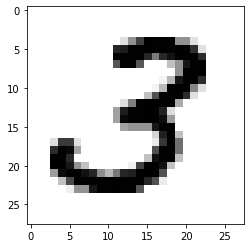

In [79]:

X = mnist["data"]
y = mnist["target"]
print(X.shape)
print(y.shape)

plot_mnist_img(X[341])



In [80]:
# training and test sets

shuffle_indexes = np.random.permutation(70000)
X, y = X[shuffle_indexes], y[shuffle_indexes]
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]



In [81]:
# plot_mnist_img(X_train[300])
# print(y_train[300])

## Binary classfication

### SGD Classifier (Linear classification with Stochastic Gradient Descent Implementation)

In [82]:
y_train = y_train.astype(np.int8)
y_test = y_train.astype(np.int8)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [83]:
print(y_train_5)

[ True False False ... False False False]


In [84]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=7)
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=7, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
print(sgd_classifier.predict([X_test[9999]]))
print(y_test[9999])

[False]
4


## Performance measures

### Accuracy. Cross validation

<img src="imgs/crossval.png" width="500px">

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [87]:
y_preds = sgd_classifier.predict(X_train)

In [88]:
cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9588 , 0.9623 , 0.94635])

# Confusion matrix

<img src="imgs/confusmat.png" width="500px">

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53533,  1011],
       [ 1640,  3816]])

## Precision, Recall

<img src="imgs/confusmat_2.png" width="200px">


Precision - accuracy of the positive predictions

`precision = TP / (TP + FP)`

Recall - sensitivity - true positive rate (TPR)

`recall = TP / (TP +  FN)`

In [90]:
from sklearn.metrics import precision_score, recall_score

prec = precision_score(y_train_5, y_train_pred)
print(prec)

recall = recall_score(y_train_5, y_train_pred)
print(recall)


0.7905531385954009
0.6994134897360704


## Decision function

In [91]:
scores = sgd_classifier.decision_function(X_train)
print("Min: {0}".format( np.min(scores)))
print("Max: {0}".format( np.max(scores)))

Min: -70719.65437102984
Max: 21219.16941285781


## Precision Recall Curve

In [92]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Min: -140061.4066903356
Max: 41140.66636839264


(0, 1)

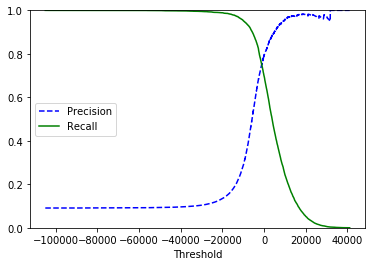

In [93]:
# plotting
print("Min: {0}".format( np.min(y_scores)))
print("Max: {0}".format( np.max(y_scores)))

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.ylim([0, 1])


Text(0, 0.5, 'precision')

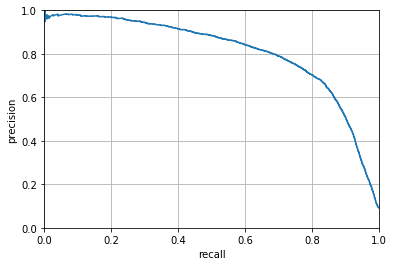

In [94]:
plt.plot(recalls, precisions)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid()
plt.xlabel("recall")
plt.ylabel("precision")

# Classroom tasks

* Apply KNN to the same ML problem
* Evaluate your model using basic metrics
* Try to implement multiclass classification (learn about OneVersusAll, OneVersusOne approaches). How to do it using sklearn packages? What will happen if we pass to the SGDClassifier a training dataset with multiclass labels? Eplain the behavior of SGDClassifier object.

# F1 score

Harmonic mean of `precision` and `recall`
<img src="imgs/f1.png" width="200px">

# The ROC Curve

Is another common tool used with binary classifiers. The ROC curve plots the `true postive rate` against `false postive rate`. The FPR is a ratio of negative instances that are incorrectly classfied as positive.


Text(0, 0.5, 'TPR')

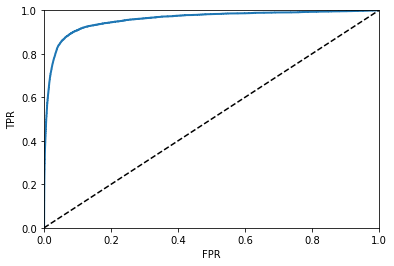

In [95]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

# plotting roc
plt.plot(fpr, tpr,  linewidth=2)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1, 0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")

Tradeoff: The higher the Recall (TPR), the more false positives the classifier produces. The dotted line is 
    a random classifier. The good clasifier stays far away from that line as possible (toward top-left corner) 

To compare classifiers use AUC. A perfect classifer has AUC 1.

In [96]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9583796125692383

# SVM
A very popular, powerful and versatile machine learning model:
Linear, non-linear classification.
regression, outlier detection

<img src="imgs/svm3.png" width="600px">

Notive adding more training instances does not affect the decision boundary. It is fully determined (or "supported")
by the instances located on the edge of the street: `Support vectors`.

### SVMs are sensitive to the feature scales
<img src="imgs/svm_scale.png" width="600px">


## Hard and Soft margin classification
<img src="imgs/svm_problem.png" width="600px">
<img src="imgs/svm_fewer.png" width="600px">

In SVM you can control the balance using the `C` hyperparameter. A smaller C value leads to a wider street
but more margin violations. 

```
If your SVM model overfitting, should you increase or decrease C value?
```



In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris

iris = load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64) # Iris Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svm", LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X,y)

svm_clf.predict([[5.5, 1.7]])

array([1.])

Try to obtain same results using other classes in `sklearn`

* SVC(kernel="linear", C=1)
* SGDClassifier(loss="hinge")


# Nonlinear SVM Classification
<img src="imgs/svm_non_lin.png" width="600px">

#### Polynomial Fetaures

In [98]:
from sklearn.preprocessing import PolynomialFeatures

poly_svm_clf = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("linear_svm", LinearSVC(C=1, loss="hinge"))
])

poly_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svm',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

We can do it for any classification algorithm. But at low poly degree it cannot deal with complex datasets, and 
with high polynomial degree it creates a huge number of features, making the model too slow.


We can do the same using `kernel trick`, and do not have such limitations.


In [99]:
from sklearn.svm import SVC

kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="poly", degree=3, C=5))
])

kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

#### Gaussian RBF kernel (Radial Basis Function)

In [100]:


kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", gamma=5, C=0.001))
])

kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


<img src="imgs/svm-rbf_formula.png" width="300px">
<img src="imgs/svm-rbf.png" width="600px">

# Classroom tasks

* Train SVM on the MNIST dataset. With one-versus-all classification for multiple classes 
* Try to obtain same results on Iris dataset as LinearSvm classifier using SGDClassifier
* SVM with RBF kernel: if your model underfit the data, what you should do with Gamma and C?